# Day2. 심화과제


Req-7. 명세서 9p의 내용을 따라 Face Detection을 하는 코드를 작성하고 실행해 보세요.

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=005efb46eed826c8b39bb7719d346999455cc3406edf6b6ec1f2a403b0dcd40c
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [8]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

In [36]:
image_path = '/gdrive/My Drive/SSAFY/test_img/workplace.jpg'

In [37]:
image = fr.load_image_file(image_path)
face_locations = fr.face_locations(image)

In [38]:
for (top, right, bottom, left) in face_locations:
  cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 3)

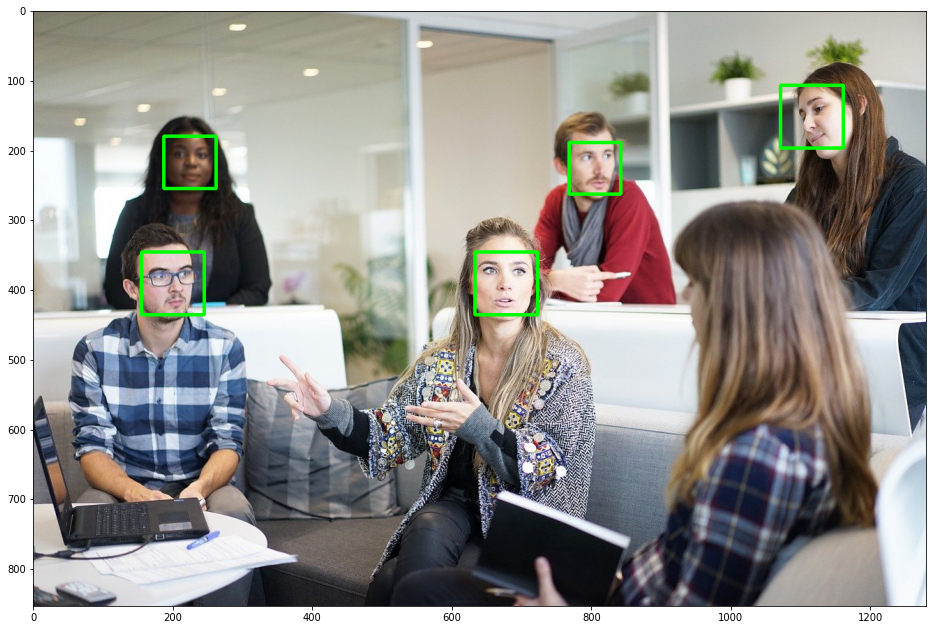

In [39]:
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image)
plt.show()

Req-8. 명세서 12p를 참고하여 4명의 인물사진에서 얼굴을 감지하여 인코딩을 한 후 새로운 인물사진 unknown을 입력 받아 기존 4명의 얼굴 중 동일인을 찾는 코드를 구현 및 실행해 보세요.


In [27]:
plt.rcParams['figure.figsize'] = (1, 1)

known_person_list = []
known_person_list.append(fr.load_image_file('/gdrive/My Drive/SSAFY/test_img/son1.jpg'))
known_person_list.append(fr.load_image_file('/gdrive/My Drive/SSAFY/test_img/person1.jpg'))
known_person_list.append(fr.load_image_file('/gdrive/My Drive/SSAFY/test_img/person2.jpg'))
known_person_list.append(fr.load_image_file('/gdrive/My Drive/SSAFY/test_img/person3.jpg'))

In [28]:
known_face_list = []
for person in known_person_list:
  top, right, bottom, left = fr.face_locations(person)[0]
  face_image = person[top:bottom, left:right]

  known_face_list.append(face_image)

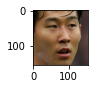

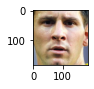

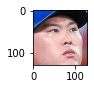

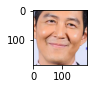

In [29]:
for face in known_face_list:
  plt.imshow(face)
  plt.show()

<function matplotlib.pyplot.show>

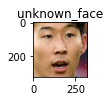

In [30]:
unknown_person = fr.load_image_file('/gdrive/My Drive/SSAFY/test_img/unknown.jpg')
top, right, bottom, left = fr.face_locations(unknown_person)[0]
unknown_face = unknown_person[top:bottom, left:right]

plt.title('unknown_face')
plt.imshow(unknown_face)
plt.show

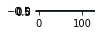

In [31]:
enc_unknown_face = fr.face_encodings(unknown_face)

plt.imshow(enc_unknown_face)
plt.show()

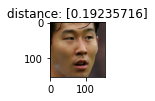

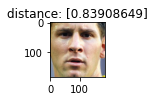

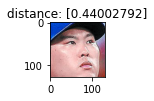

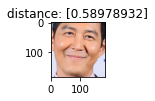

In [35]:
for face in known_face_list:
  enc_known_face = fr.face_encodings(face)
  
  distance = fr.face_distance(enc_known_face, enc_unknown_face[0])

  plt.title('distance: ' + str(distance))
  plt.imshow(face)
  plt.show()